Following the notebook of [Evan Miller](https://www.kaggle.com/evanmiller/d/wendykan/lending-club-loan-data/python-for-padawans)

In [5]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
# getting the data
data = pd.read_csv("loan.csv", low_memory=False)
data.drop(['id', 'member_id', 'emp_title'], axis=1, inplace=True) # inplace does the operation on 'data' object inplace, returns none

data.replace('n/a', np.nan, inplace=True)
data.emp_length.fillna(value=0, inplace=True)

data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['emp_length'] = data['emp_length'].astype(int)

data['term'] = data['term'].apply(lambda x: x.lstrip())

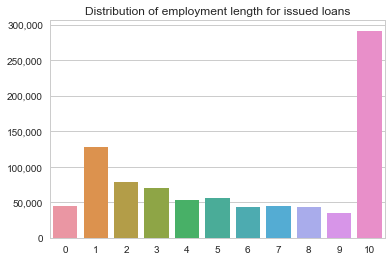

In [6]:
import seaborn as sns
import matplotlib

s = pd.value_counts(data['emp_length']).to_frame().reset_index()
s.columns = ['type', 'count']

def emp_dur_graph(graph_title):
    sns.set_style("whitegrid")
    ax = sns.barplot(y = "count", x = 'type', data = s)
    ax.set(xlabel = '', ylabel = '', title = graph_title)
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
emp_dur_graph('Distribution of employment length for issued loans')

In [7]:
print(plt.style.available)

['ggplot', 'seaborn-ticks', 'seaborn-paper', 'seaborn-bright', 'seaborn-white', 'seaborn-dark', 'seaborn', 'seaborn-poster', 'seaborn-dark-palette', 'classic', 'seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-talk', 'seaborn-whitegrid', 'seaborn-deep', 'seaborn-notebook', 'fivethirtyeight', 'seaborn-muted', 'seaborn-pastel', 'dark_background', 'grayscale', 'bmh']


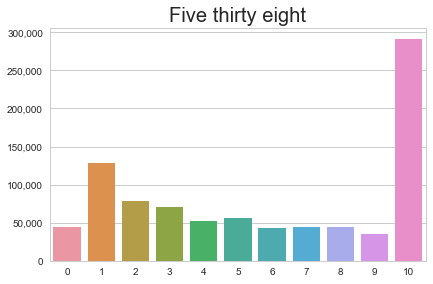

In [8]:
plt.style.use('fivethirtyeight')
ax = emp_dur_graph('Five thirty eight')

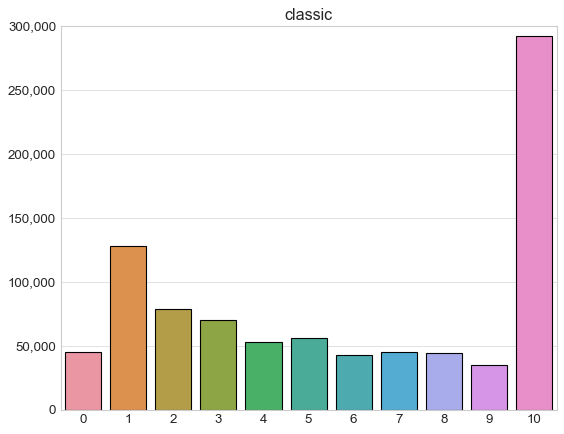

In [9]:
plt.style.use('classic')
ax = emp_dur_graph('classic')

In [33]:
import datetime

data.issue_d.fillna(value=np.nan,inplace=True)
issue_d_todate = pd.to_datetime(data.issue_d, errors='coerce')
data.issue_d = pd.Series(data.issue_d).str.replace('-2015', '')
data.emp_length.fillna(value=np.nan,inplace=True)

# data.drop(['loan_status'], 1, inplace=True)
data.drop(['pymnt_plan', 'url', 'desc', 'title'], 1, inplace=True)

data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line)
import datetime as dt
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

`earliest_cr_line` : The month the borrower's earliest reported credit line was opened

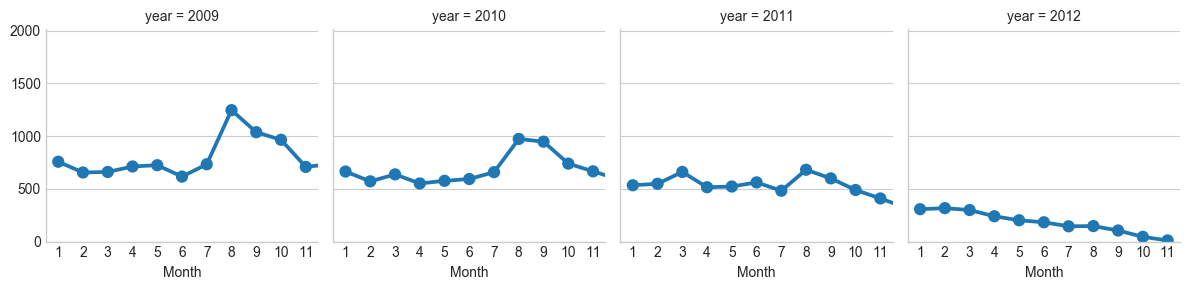

In [35]:
s = pd.value_counts(data['earliest_cr_line']).to_frame().reset_index()
s.columns = ['date', 'count']

s['year'] = s['date'].dt.year
s['month'] = s['date'].dt.month

d = s[s['year'] > 2008]

plt.rcParams.update(plt.rcParamsDefault)
sns.set_style("whitegrid")

g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
axes = plt.gca()
_ = axes.set_ylim([0, d.year.max()])
plt.tight_layout()

Interesting trend... it looks like a general downtrend in the recent years... if we categorize by years, does that hold true for LendingClub?

2007-06-01       24
2007-07-01       63
2007-08-01       74
2007-09-01       53
2007-10-01      105
2007-11-01      112
2007-12-01      172
2008-01-01      305
2008-02-01      306
2008-03-01      402
2008-04-01      259
2008-05-01      115
2008-06-01      124
2008-07-01      141
2008-08-01      100
2008-09-01       57
2008-10-01      122
2008-11-01      209
2008-12-01      253
2009-01-01      269
2009-02-01      302
2009-03-01      324
2009-04-01      333
2009-05-01      359
2009-06-01      406
2009-07-01      411
2009-08-01      446
2009-09-01      507
2009-10-01      604
2009-11-01      662
              ...  
2012-07-01     4627
2012-08-01     5419
2012-09-01     6087
2012-10-01     6263
2012-11-01     6382
2012-12-01     6066
2013-01-01     6872
2013-02-01     7561
2013-03-01     8273
2013-04-01     9419
2013-05-01    10350
2013-06-01    10899
2013-07-01    11910
2013-08-01    12674
2013-09-01    12987
2013-10-01    14114
2013-11-01    14676
2013-12-01    15020
2014-01-01    15628


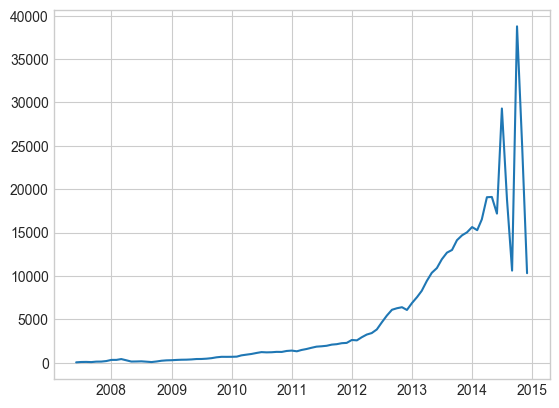

In [44]:
loancount = pd.value_counts(issue_d_todate).sort_index()
print(loancount)
plt.plot(loancount)

In [46]:
mths = [s for s in data.columns.values if "mths" in s]
mths

data.drop(mths, axis=1, inplace=True)

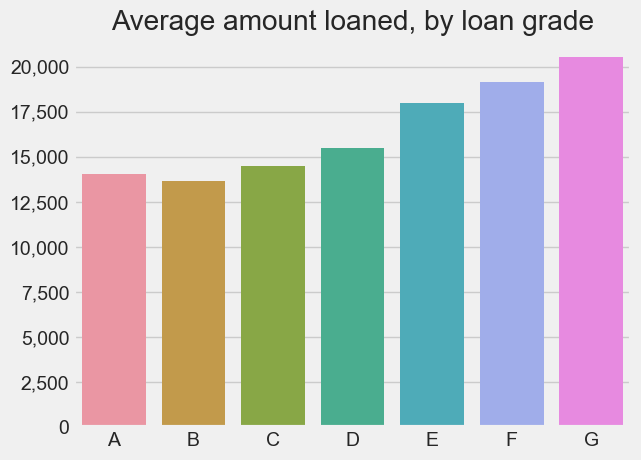

In [48]:
group = data.groupby('grade').agg([np.mean])
loan_amt_mean = group['loan_amnt'].reset_index()

plt.style.use('fivethirtyeight')
ax = sns.barplot(y="mean", x='grade', data=loan_amt_mean)
ax.set(xlabel='', ylabel='', title='Average amount loaned, by loan grade')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

Notice how higher grade debt has a lower average loaned amount...

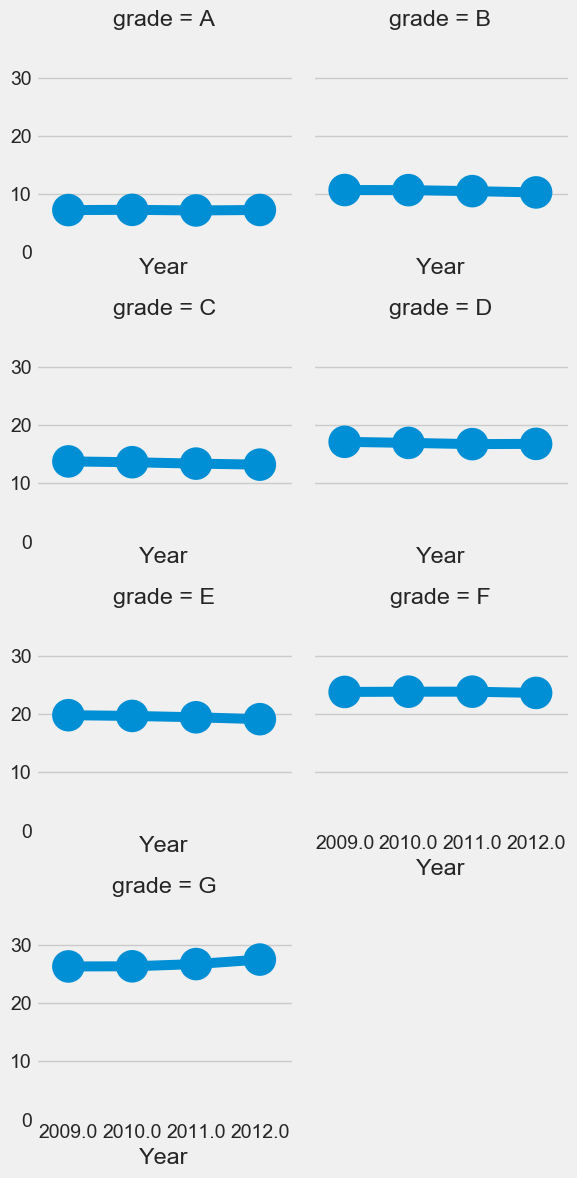

In [51]:
filtered = data[data['earliest_cr_line_year'] > 2008]
group = filtered.groupby(['grade', 'earliest_cr_line_year']).agg([np.mean])

graph_df = group['int_rate'].reset_index()

g = sns.FacetGrid(graph_df, col="grade", col_wrap=2)
g = g.map(sns.pointplot, "earliest_cr_line_year", "mean")
g.set(xlabel = 'Year', ylabel = '')
axes = plt.gca()
axes.set_ylim([0, graph_df['mean'].max()+10])
_ = plt.tight_layout()

In [71]:
# mean, median, algorithmic, e.g.
data['emp_length'].fillna(data['emp_length'].mean())
data['emp_length'].fillna(data['earliest_cr_line_year'].median())

# algorithmic approach
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)

# data['emp_length'].replace(to_replace=0, value=np.nan, inplace=True, regex=True)

# cat_variables = ['term', 'purpose', 'grade']
# columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'purpose', 'term']

# def impute_missing_algo(df, target, cat_vars, cols, algo):
#     y = pd.DataFrame(df[target])
#     X = df[cols].copy()
#     X.drop(cat_vars, axis=1, inplace=True)
    
#     cat_vars = pd.get_dummies(df[cat_vars])
    
#     X = pd.concat([X, cat_vars], axis = 1)
    
#     y['null'] = y[target].isnull()
#     y['null'] = y.loc[:, target].isnull()
#     X['null'] = y[target].isnull
    
#     y_missing = y[y['null'] == True]
#     y_notmissing = y[y['null'] == False]
#     X_missing = X[X['null'] == True]
#     X_notmissing = X[X['null'] == False]
    
#     y_missing.loc[:, target] = ''
    
#     dfs = [y_missing, y_notmissing, X_missing, X_notmissing]
    
#     for df in dfs:
#         df.drop('null', inplace=True, axis=1)
        
#     y_missing = y_missing.values.ravel(order='C')
#     y_notmissing = y_notmissing.values.ravel(order='C')
#     X_missing = X_missing.as_matrix()
#     X_notmissing = X_notmissing.as_matrix()
    
#     algo.fit(X_notmissing, y_notmissing)
#     y_missing = algo.predict(X_missing)
    
#     y.loc[(y['null'] == True), target] = y_missing
#     y.loc[(y['null'] == False), target] = y_notmissing
    
#     return(y[target])

# data['emp_length'] = impute_missing_algo(data, 'emp_length', cat_variables, columns, rf)
# data['earliest_cr_line_year'] = impute_missing_algo(data, 'earliest_cr_line_year', cat_variables, columns, rf)

data = data[np.isfinite(data['emp_length'])]

print('emp_length that is null:', data['emp_length'].isnull().sum(), 'out of total:', data['emp_length'].count())

emp_length that is null: 0 out of total: 842554


In [82]:
data = data[np.isfinite(data['earliest_cr_line_year'])]

print('earliest_cr_line_year that is null:', data['earliest_cr_line_year'].isnull().sum(), 'out of total:', data['earliest_cr_line_year'].count())

earliest_cr_line_year that is null: 0 out of total: 842525


In [83]:
y = data.term

cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'grade', 'emp_length', 'purpose', 'earliest_cr_line_year']
X = pd.get_dummies(data[cols])

from sklearn import preprocessing

y = y.apply(lambda x: x.lstrip())

le = preprocessing.LabelEncoder()
le.fit(y)

y = le.transform(y)
X = X.as_matrix()

from sklearn import linear_model

logistic = linear_model.LogisticRegression()

logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
from sklearn import linear_model, decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

rf = RandomForestClassifier(max_depth=5, max_features=1)

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('rf', rf)])

n_comp = [3, 5]
n_est = [10, 20]

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_comp,
                              rf__n_estimators=n_est))

estimator.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=1, max_leaf_nodes=None,
            min_im...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [3, 5], 'rf__n_estimators': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)